<a href="https://colab.research.google.com/github/HigurashiKagome/AI/blob/main/10_13AI%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05

/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

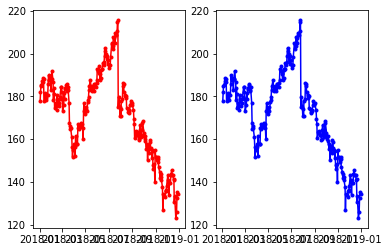

In [ ]:
fig, axes = plt.subplots(1,2)
axes[0].plot(fb.index, fb.open,'.-r')
axes[1].plot(fb.index, fb.open,'.-b')

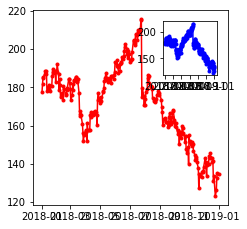

In [ ]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])
outside.plot(fb.index, fb.open,'.-r')
inside.plot(fb.index, fb.open,'.-b')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [ ]:
covid.countriesAndTerritories

date
2020-01-18           Croatia
2020-01-18            Greece
2020-01-18    United_Kingdom
2020-01-18        Azerbaijan
2020-01-18           Bahrain
                   ...      
2020-09-18           Denmark
2020-09-18              Iraq
2020-09-18           Bahamas
2020-09-18       Isle_of_Man
2020-09-18         Australia
Name: countriesAndTerritories, Length: 42304, dtype: object

In [ ]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).rolling(7).mean()

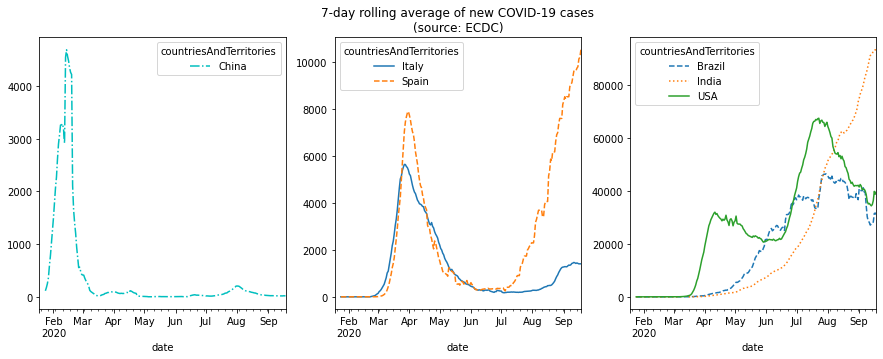

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['China']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

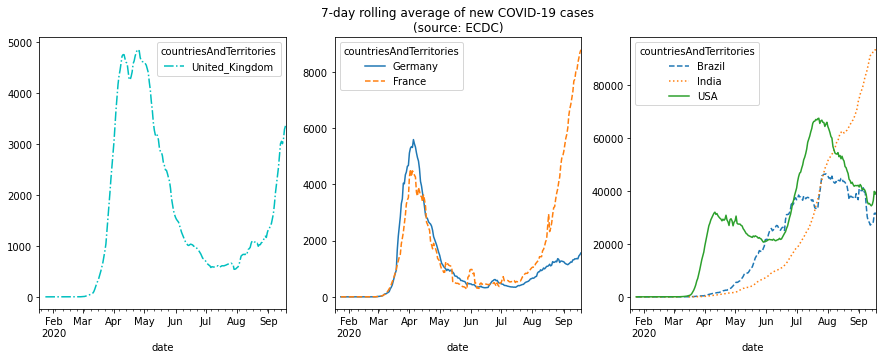

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['United_Kingdom']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Germany', 'France']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

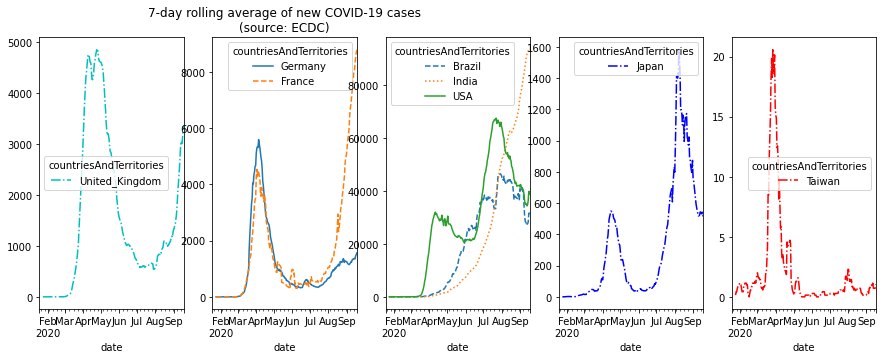

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

new_cases_rolling_average[['United_Kingdom']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Germany', 'France']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])
new_cases_rolling_average[['Japan']].plot(ax=axes[3], style='-.b')
new_cases_rolling_average[['Taiwan']].plot(ax=axes[4], style='-.r')

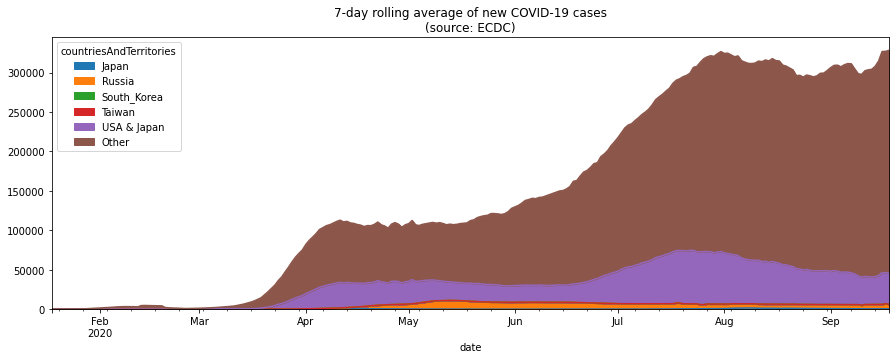

In [ ]:
cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['South_Korea', 'Japan', 'Taiwan', 'Russia']
]
new_cases_rolling_average.assign(
    **{'USA & Japan': lambda x: x.USA + x.Japan}
).sort_index(axis=1).assign(
    Other=lambda x: x[cols].sum(axis=1)
).drop(columns=cols).plot(
    kind='area', figsize=(15, 5), 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

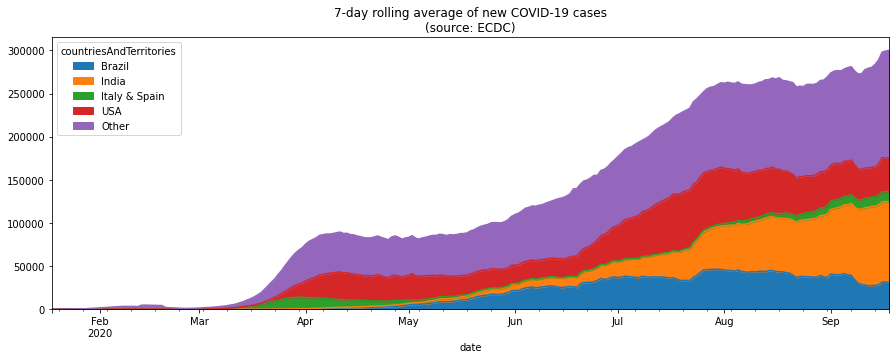

In [ ]:
cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['USA', 'Brazil', 'India', 'Italy & Spain']
]
cols2 = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['USA', 'Brazil', 'India', 'Italy' 'Spain']  # Other에 포함된 각각의 이탈리아 스페인 제거
]
new_cases_rolling_average.assign(
    **{'Italy & Spain': lambda x: x.Italy + x.Spain}
).sort_index(axis=1).assign(
    Other=lambda x: x[cols].sum(axis=1)
).drop(columns=cols).plot(
    kind='area', figsize=(15, 5), 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

Text(0, 0.5, 'count')

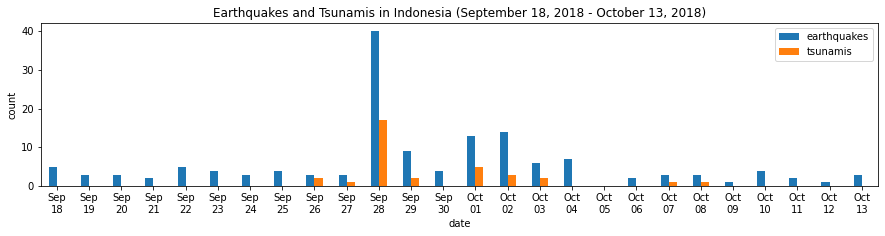

In [ ]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

Text(0, 0.5, 'count')

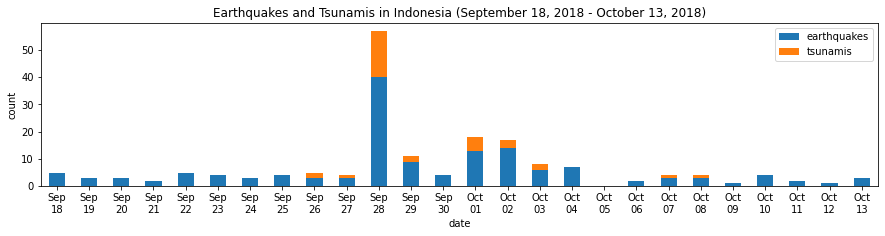

In [ ]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), stacked=True,
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

In [ ]:
indonesia_quakes

,mag,tsunami,earthquake
time,,,
Sep\n18,22.1,0,5
Sep\n19,13.1,0,3
Sep\n20,12.8,0,3
Sep\n21,8.9,0,2
Sep\n22,23.1,0,5
Sep\n23,18.2,0,4
Sep\n24,13.4,0,3
Sep\n25,17.1,0,4
Sep\n26,14.2,2,3


Text(0, 0.5, 'ratio')

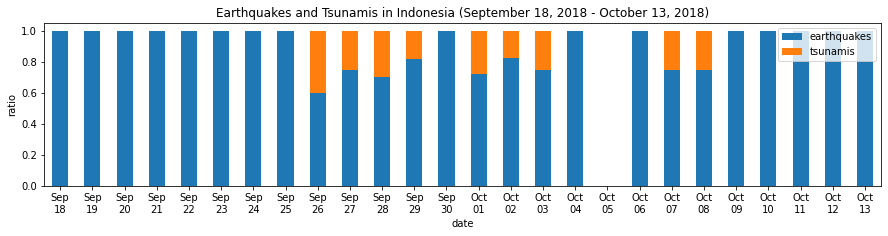

In [ ]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes[['earthquake', 'tsunami']].apply(lambda x: x / x.sum(), axis=1).plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), stacked=True,
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('ratio')

Text(0, 0.5, '')

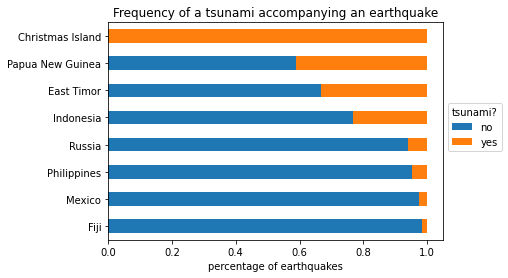

In [ ]:
quakes.groupby(['parsed_place', 'tsunami']).mag.count()\
    .unstack().apply(lambda x: x / x.sum(), axis=1)\
    .rename(columns={0: 'no', 1: 'yes'})\
    .sort_values('yes', ascending=False)[7::-1]\
    .plot.barh(
        title='Frequency of a tsunami accompanying an earthquake', 
        stacked=True
    )

# move legend to the right of the plot
plt.legend(title='tsunami?', bbox_to_anchor=(1, 0.65))

# label the axes (discussed in chapter 6)
plt.xlabel('percentage of earthquakes')
plt.ylabel('')